In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from sklearn.datasets import load_boston

In [45]:
boston_df = load_boston()
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [46]:
print(boston_df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Preparing DataSet

In [47]:
data = pd.DataFrame(boston_df.data, columns = boston_df.feature_names)
data['Sale_Price'] = boston_df.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  Sale_Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [49]:
data['Sale_Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Sale_Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb3727950d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb372795b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb3727a2b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb3727a3650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb3727a3b90>],
 'means': []}

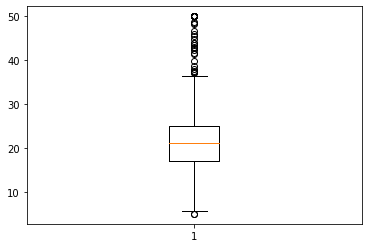

In [50]:
plt.boxplot(x = data['Sale_Price'])

In [51]:
q1 = data['Sale_Price'].quantile(0.25)
q3 = data['Sale_Price'].quantile(0.75)
iqr = q3-q1

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit,lower_limit

def limit_imputer(value):
  if value<lower_limit:
    return lower_limit
  if value>upper_limit:
    return upper_limit
  else:
    return value

In [52]:

data['Sale_Price']=data['Sale_Price'].apply(limit_imputer)

(array([ 12.,  24.,  54.,  57., 102., 106.,  41.,  31.,  25.,  54.]),
 array([ 5.0625,  8.2525, 11.4425, 14.6325, 17.8225, 21.0125, 24.2025,
        27.3925, 30.5825, 33.7725, 36.9625]),
 <a list of 10 Patch objects>)

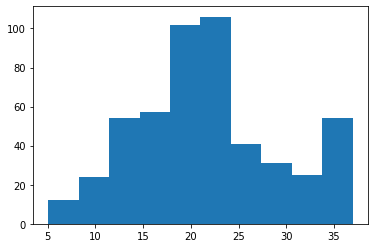

In [53]:
plt.hist(x = data['Sale_Price'], bins =10)

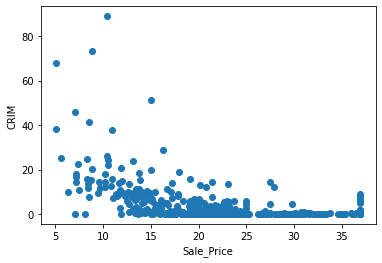

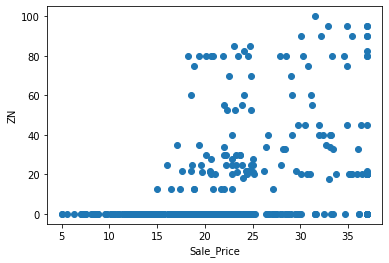

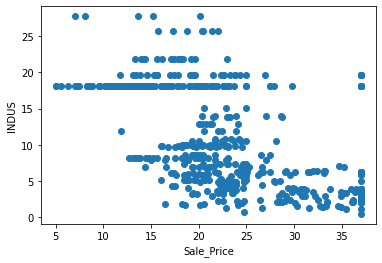

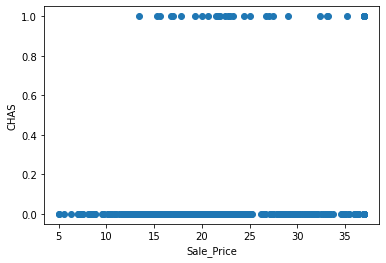

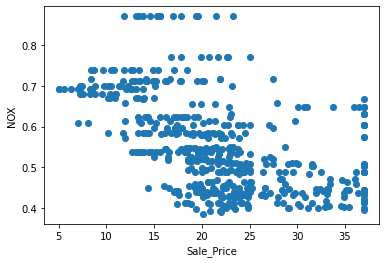

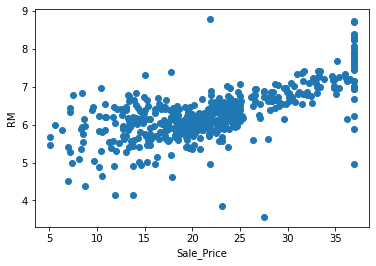

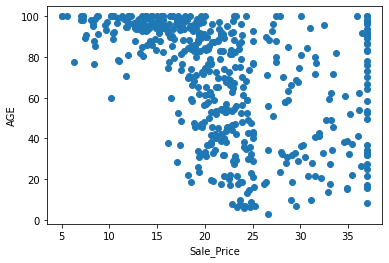

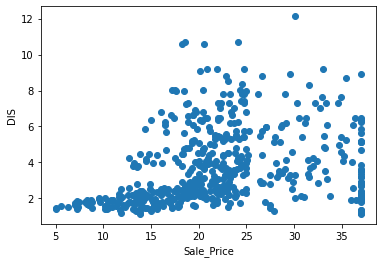

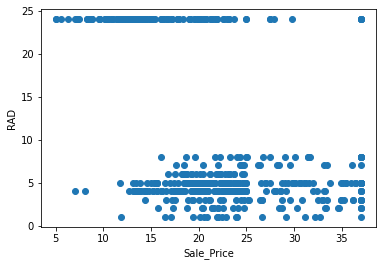

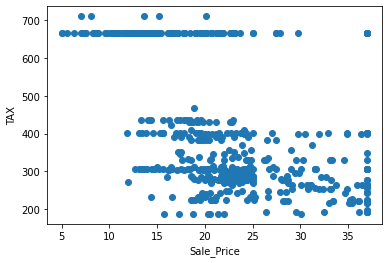

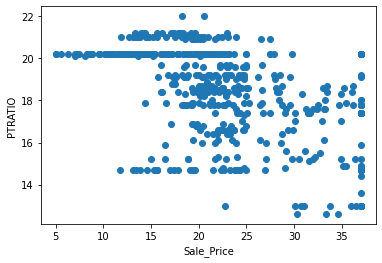

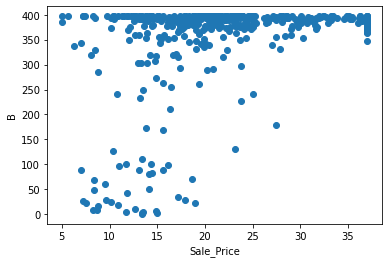

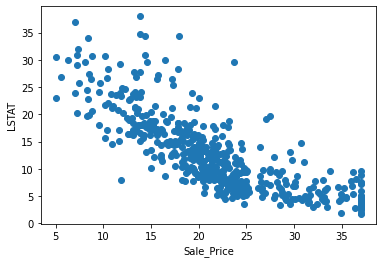

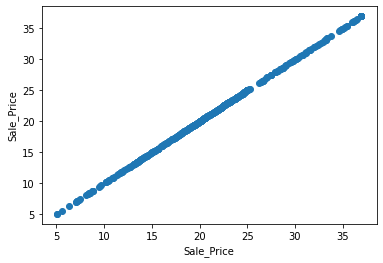

In [54]:
for i in data.columns:
  plt.scatter(x = data['Sale_Price'], y = data[i])
  plt.xlabel("Sale_Price")
  plt.ylabel(i)
  plt.show()

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1   ZN          506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    float64
 4   NOX         506 non-null    float64
 5   RM          506 non-null    float64
 6   AGE         506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    float64
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  Sale_Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [56]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [57]:
C = data.corr()
C

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.451354
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.398357
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.561174
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.146061
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.506505
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.676196
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.458662
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.329154
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.452679
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.543545


##Independant and dependaant feature


In [58]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

## Train, test split data

In [59]:
from sklearn.model_selection import train_test_split as tts

x_train,x_test,y_train,y_test = tts(x,y,train_size=0.8, random_state = 81)

In [60]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
37,0.08014,0.0,5.96,0.0,0.4990,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
345,0.03113,0.0,4.39,0.0,0.4420,6.014,48.5,8.0136,3.0,352.0,18.8,385.64,10.53
387,22.59710,0.0,18.10,0.0,0.7000,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99
436,14.42080,0.0,18.10,0.0,0.7400,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.09512,0.0,12.83,0.0,0.4370,6.286,45.0,4.5026,5.0,398.0,18.7,383.23,8.94
430,8.49213,0.0,18.10,0.0,0.5840,6.348,86.1,2.0527,24.0,666.0,20.2,83.45,17.64
312,0.26169,0.0,9.90,0.0,0.5440,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
193,0.02187,60.0,2.93,0.0,0.4010,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03


##Scaling/Normalize the data


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##Model Training

In [63]:
from sklearn.linear_model import LinearRegression as LR
model = LR()

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
model.coef_

array([-0.96548862,  0.69527606, -0.23913   ,  0.51974894, -1.41098395,
        1.98921762, -0.39058264, -2.32606975,  1.89454957, -1.53939922,
       -1.74550425,  0.80837869, -3.22041278])

In [66]:
model.intercept_

21.87267945544559

In [67]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [68]:
# Predictions with test Data
predictions = model.predict(x_test)

In [69]:
predictions

array([26.17195752, 21.63988128, 19.21830177, 22.37578693, 19.17401018,
       33.71173313, 27.32149428, 37.08321496, 20.93207515, 20.80811696,
       22.7849907 , 32.69487727, 22.5071943 , 29.09092486, 27.90563606,
       18.81907165, 23.03105021, 18.97384792, 23.90835376, 20.27181025,
       37.01336699, 20.11987803,  5.77272648, 24.14126909, 26.8047308 ,
       23.62132451, 15.1886007 , 14.22914518, 14.48331966, 15.24683056,
       26.82528075, 17.34010277, 34.66227658, 15.84141787, 20.03703721,
       30.97986854, 28.94592805, 27.52214621, 19.63312505, 18.18654673,
       31.37761996, 25.2138659 , 19.99212354, 12.8077584 , 15.30549617,
       18.74680949, 19.202223  , 15.29054914, 18.02374889, 29.76718225,
       29.87810507, 24.85840126, 22.96896372, 23.05118534, 24.77715547,
       16.87004094, 15.29195164, 17.90505215, 16.30616079, 21.94242516,
       29.27484639, 22.43900993, 24.42098067, 27.0597926 , 22.267043  ,
       33.29089577, 25.44648252, 24.42711135, 14.00869171, 13.38

##Check predicted values are acurrate or not

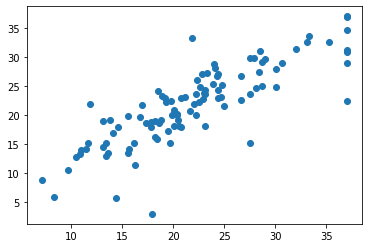

In [70]:
# Plot a scatter plot for the prediction
plt.scatter(y_test,predictions)

##Since graph is also linear then our predictions are accurate somehow
# The other way to check with residual plots


In [71]:
# Resudals
residuals = y_test - predictions
residuals

288    -3.871958
360     3.360119
122     1.281698
86      0.124213
393    -5.374010
         ...    
35     -4.493045
435     0.411564
505   -10.018356
318    -0.552616
126     1.577461
Name: Sale_Price, Length: 102, dtype: float64

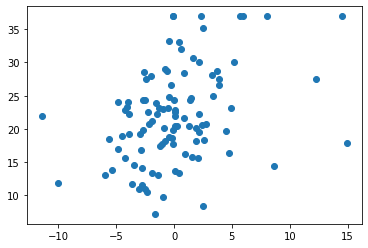

In [72]:
plt.scatter(residuals, y_test)

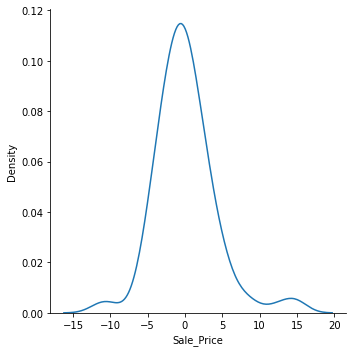

In [73]:
  sns.displot(residuals, kind = 'kde')
  #the graph must give normal distribution curve

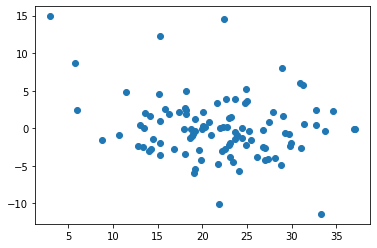

In [74]:
plt.scatter(predictions, residuals)
#graph should have uniform distribution

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,predictions))
print(mean_squared_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

2.8428813418208505
16.35769098082916
4.0444642390345305


In [76]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
score

0.6738813985932506

In [77]:
#adjusted R2 score = 1-[(1-R2)*(n-1)/(n-k-1)]
1-(1-score)*(len(y_test) -1 )/ (len(y_test)-x_test.shape[1]-1)

0.625704787021799

#New Data Prediction

In [78]:
boston_df.data[0].reshape(1,-1),boston_df.target[0]

(array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
         6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
         4.980e+00]]), 24.0)

In [79]:
# always Transform the new data
scaler.transform(boston_df.data[0].reshape(1,-1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.41441895,  0.27402832, -1.29838514, -0.23998255, -0.14352154,
         0.39597014, -0.14013671,  0.15052762, -0.99439769, -0.6712358 ,
        -1.41990291,  0.44302267, -1.10083084]])

In [80]:
# model.predic(boston_df.data[0])

In [81]:
model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([28.87491884])

Pickling The Model file for Deployment

In [82]:
import pickle
pickle.dump(model,open('boston_prediction.pkl', 'wb'))

In [83]:
pickled_model = pickle.load(open('/content/boston_prediction.pkl', 'rb'))

In [84]:
pickled_model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([28.87491884])